In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Para deixar os plots brancos
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.titlecolor" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [2]:
#Importando os dados e já transforma a coluna de ID do test em index
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv', index_col=0)
sample = pd.read_csv('../sample_submission.csv')

# 5 primeiras linhas do conjunto de treinamento
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


### Análise dos Dados

Para auxiliar no trabalho de escrita e entendimento do código, vamos adicionar o pacote ipdb de debug, que nos auxilia com métodos de debug como breakpoints

In [12]:
import ipdb

vamos usar o comando "%pdb on" para que sempre que o código resultar em uma Exception, o código irá parar e o visualizador do debug irá abrir automaticamente.

In [13]:
%pdb on

Automatic pdb calling has been turned ON


In [14]:
# Para facilitar o trabalho e enxergar tudo de maneira organizada e resumida, vamos definir uma função:

def info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('TIPOS DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-'*50)
    print('NÚMERO DE VALORES ÚNICOS POR FEATURE \n')
    print(data.nunique())
    print('\n', '-'*50)
    print('VALORES NULOS POR FEATURE')
    existe = data.isnull().sum().any()
    print('Existe algum valor nulo?: ' + str(existe))
    print(data.isnull().sum())
    print('\n', '-'*50)
    print('ESTATÍSTICAS BÁSICAS')
    print(data.describe())

In [15]:
info(train)

DATASET SHAPE:  (76020, 371) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None

 --------------------------------------------------
NÚMERO DE VALORES ÚNICOS POR FEATURE 

ID                         76020
var3                         208
var15                        100
imp_ent_var16_ult1           596
imp_op_var39_comer_ult1     7551
                           ...  
saldo_medio_var44_hace3       33
saldo_medio_var44_ult1       141
saldo_medio_var44_ult3       141
var38                      57736
TARGET                         2
Length: 371, dtype: int64

 --------------------------------------------------
VALORES NULOS POR FEATURE
Existe algum valor nulo?: False
ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var

Observamos que não existem valores nulos no dataset. A variável "ID", aparentemente, é o único valor único de diferenciação dentre os outros.
A função .info() indica "dtypes: float64(111), int64(260)", portanto não existem variáveis categóricas.

In [16]:
info(test)

DATASET SHAPE:  (75818, 369) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75818 entries, 2 to 151837
Columns: 369 entries, var3 to var38
dtypes: float64(110), int64(259)
memory usage: 214.0 MB
None

 --------------------------------------------------
NÚMERO DE VALORES ÚNICOS POR FEATURE 

var3                         199
var15                        100
imp_ent_var16_ult1           598
imp_op_var39_comer_ult1     7593
imp_op_var39_comer_ult3     9154
                           ...  
saldo_medio_var44_hace2       99
saldo_medio_var44_hace3       28
saldo_medio_var44_ult1       148
saldo_medio_var44_ult3       148
var38                      57570
Length: 369, dtype: int64

 --------------------------------------------------
VALORES NULOS POR FEATURE
Existe algum valor nulo?: False
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_v

Observamos que, assim como na base de treinamento, não existem valores nulos em nenhuma coluna do dataset. Enquanto na base de treino existem 76020 amostras, na base de teste existem 75818, o que é uma divisão quase de 50% para treino e teste. Idealmente esta divisão deveria ter uma maior proporção para o treino.
A função .info() indica "dtypes: float64(110), int64(260)", portanto não existem variáveis categóricas.

Para melhor construção da rede neural, vamos verificar as colunas que não avriam, afim de identificar quais variáveis não terão efeito na hora de predizer o resultado.

In [3]:
# Verifica quais colunas não variam (std = 0)
features_to_drop = train.nunique()
features_to_drop = features_to_drop.loc[features_to_drop.values==1].index

# Retira essas colunas dos dados de treino e teste
train = train.drop(features_to_drop,axis=1)
test  = test.drop(features_to_drop,axis=1)


#Vamos adicioanr um breakpoint aqui para saber se a variável X2_train foi de fato criada da maneira que queríamos
# ipdb.set_trace()

In [18]:
# Como cada atributo se correlaciona com o TARGET
corr_matrix = train.corr()
corr_matrix["TARGET"].sort_values(ascending=False)

TARGET                 1.000000
var36                  0.102919
var15                  0.101322
ind_var8_0             0.046665
num_var8_0             0.046622
                         ...   
ind_var5              -0.135349
num_var42             -0.135693
num_var30             -0.138289
num_meses_var5_ult3   -0.148253
ind_var30             -0.149811
Name: TARGET, Length: 337, dtype: float64

In [19]:
# Verifica se existe algum valor nulo
train.isnull().values.any()

False

In [4]:
# Separa o TARGET das outras features
y = train['TARGET']
X = train.drop(['ID','TARGET'], axis=1)

X.shape, y.shape

((76020, 335), (76020,))

Text(0, 0.5, 'Quantidade')

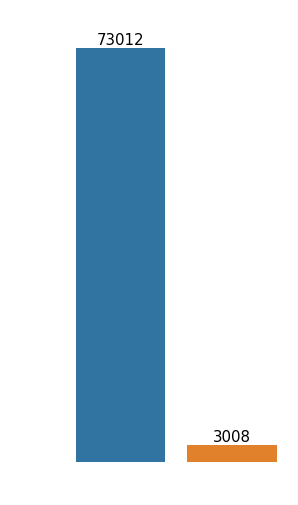

In [24]:
# Verifica a distribuição dos valores de target

#Gerando o gráfico
fig = plt.figure(figsize=(4,8))
ax = sns.countplot(data=train, 
                 x='TARGET',  
                 order=train['TARGET'].value_counts().index,
                )
ax.bar_label(ax.containers[0], fontsize=15)
ax.set_title('Quantidade de satisfação', fontsize=18)
ax.set_xlabel('Satisfação', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 

Note que temos muito mais exemplos de não satisfação (TARGET=0) do que de satisfação (Target=1). Idealmente, é interessante considerar técnicas de balanceamento de base de dados.

### Modelagem da Rede Neural

In [8]:
# Para escolher entre over sampling e under sampling
# Comenta um e descomenta o outro
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# from imblearn.under_sampling import RandomUnderSampler

# under = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = under.fit_resample(X,y)

# y_resampled.value_counts().to_frame().T

In [5]:
# Divide os dados de treino em treino e validação
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  shuffle=True)

X_train.shape, X_val.shape

((60816, 335), (15204, 335))

In [6]:
# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test)

In [7]:
from tensorflow.keras import models, layers, optimizers, metrics, utils, wrappers

# Define as variáveis que serão utilizadas posteriormente
learning_rate = 0.001
hidden_nodes = 10
output_nodes = 1

batch_size = 1000
epochs = 300

# Cria o modelo no keras com 2 hidden layers com 10 neurônios
model = models.Sequential()

model.add(layers.Dense(units=hidden_nodes, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(layers.Dense(units=hidden_nodes, activation='relu'))
model.add(layers.Dense(units=output_nodes, activation='sigmoid'))

# Compila o modelo
model.compile(optimizer=optimizers.Adam(learning_rate = learning_rate),loss='binary_crossentropy', metrics=metrics.AUC(name='auc'))

In [9]:
model.summary()
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                3360      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Cria um early stopping monitorando a Validation Loss
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.0001, # Valor mínimo de mudança para considerar como melhoria
    patience  = 20,     # Quantas épocas esperar até parar
    mode = 'auto',
    restore_best_weights=True
)

In [9]:
# Treina o modelo
history = model.fit(X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[early_stopping])

Epoch 1/300
61/61 [==============================] - 2s 11ms/step - loss: 0.4162 - auc: 0.5491 - val_loss: 0.2017 - val_auc: 0.6010
Epoch 2/300
61/61 [==============================] - 0s 3ms/step - loss: 0.1712 - auc: 0.6250 - val_loss: 0.1640 - val_auc: 0.6262
Epoch 3/300
61/61 [==============================] - 0s 3ms/step - loss: 0.1599 - auc: 0.6525 - val_loss: 0.1606 - val_auc: 0.6571
Epoch 4/300
61/61 [==============================] - 0s 3ms/step - loss: 0.1579 - auc: 0.6722 - val_loss: 0.1595 - val_auc: 0.6740
Epoch 5/300
61/61 [==============================] - 0s 4ms/step - loss: 0.1566 - auc: 0.6903 - val_loss: 0.1588 - val_auc: 0.6867
Epoch 6/300
61/61 [==============================] - 0s 3ms/step - loss: 0.1557 - auc: 0.6955 - val_loss: 0.1580 - val_auc: 0.6911
Epoch 7/300
61/61 [==============================] - 0s 3ms/step - loss: 0.1547 - auc: 0.7035 - val_loss: 0.1572 - val_auc: 0.6951
Epoch 8/300
61/61 [==============================] - 0s 3ms/step - loss: 0.1538 - 

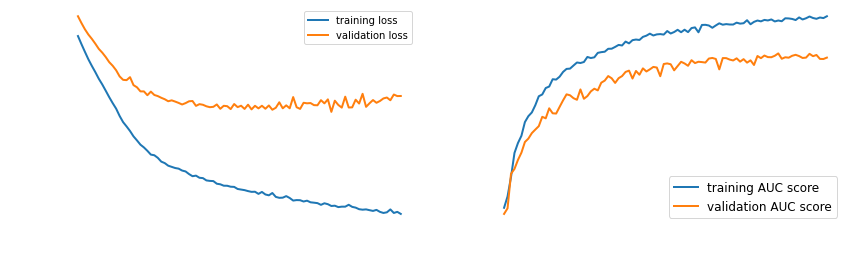

In [10]:
# Mostra os valores dos erros e a curva ROC dsobre o treino e validação
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation AUC score')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("ROC AUC", fontsize=15)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [32]:
# Atualiza o sample com os valores preditos e exporta o CSV
sample["TARGET"] = model.predict(test)
# sample.to_csv(r'../submission/submission_Normal_10-10_valLoss.csv',index=False)
sample

,ID,TARGET
0,2,0.028526
1,5,0.035214
2,6,0.008311
3,7,0.027319
4,9,0.008435
...,...,...
75813,151831,0.036668
75814,151832,0.012934
75815,151833,0.007994
75816,151834,0.031861


In [43]:
# Cria um outro modelo no Keras mas desta vez utilizando um wrapper para usar RandomizedSearch do Scikit_Learn
from tensorflow.keras import wrappers

def build_model(n_hidden=2, n_neurons=20, learning_rate=1e-3, input_shape=[X_train.shape[-1],]):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation="relu"))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(learning_rate = learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.AUC()])
    return model

keras_class = wrappers.scikit_learn.KerasClassifier(build_model)

In [44]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Mantém o Early Stop
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.0001, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    mode = 'auto',
    restore_best_weights=True
)

# Define quais parâmetros serão avaliados 
param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(10, 100).tolist(),
    "learning_rate": reciprocal(1e-4, 1e-3).rvs(100).tolist(),
}

# Performa o Randomized Search
rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3, scoring='roc_auc', verbose=1)
rnd_search_cv.fit(X_train, y_train,
            validation_data=(X_val,y_val),
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[early_stopping])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/300
41/41 [==============================] - 2s 18ms/step - loss: 0.4787 - auc: 0.5001 - val_loss: 0.2391 - val_auc: 0.5963
Epoch 2/300
41/41 [==============================] - 0s 5ms/step - loss: 0.1869 - auc: 0.6087 - val_loss: 0.1665 - val_auc: 0.6226
Epoch 3/300
41/41 [==============================] - 0s 5ms/step - loss: 0.1626 - auc: 0.6496 - val_loss: 0.1620 - val_auc: 0.6494
Epoch 4/300
41/41 [==============================] - 0s 5ms/step - loss: 0.1597 - auc: 0.6645 - val_loss: 0.1605 - val_auc: 0.6633
Epoch 5/300
41/41 [==============================] - 0s 5ms/step - loss: 0.1581 - auc: 0.6832 - val_loss: 0.1595 - val_auc: 0.6849
Epoch 6/300
41/41 [==============================] - 0s 5ms/step - loss: 0.1568 - auc: 0.7041 - val_loss: 0.1588 - val_auc: 0.6871
Epoch 7/300
41/41 [==============================] - 0s 5ms/step - loss: 0.1559 - auc: 0.7064 - val_loss: 0.1582 - val_auc: 0.6972
Epoch 8/300
41/41 [==

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B5413B7370>,
                   param_distributions={'learning_rate': [0.00010251172850644191,
                                                          0.0003445280814819776,
                                                          0.00014712120540926916,
                                                          0.00016443047411431012,
                                                          0.00010771011262743605,
                                                          0.00016270884259618023,
                                                          0.0004978468279830347,
                                                          0.0001269513545325419,
                                                          0.00010...
                                                          0.0008684165895107475,
                                                          0.00024348342771623053,
                                                          0.0008635764117306519,
                                                          0.00010703883951432702,
                                                          0.0007759131134268235,
                                                          0.00020131910883616736,
                                                          0.00016714545832681097,
                                                          0.0003940784440483949,
                                                          0.00015656712309760235, ...],
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...]},
                   scoring='roc_auc', verbose=1)

In [69]:
# Mostra os melhores parâmetros que foram escolhidos
rnd_search_cv.best_params_

{'n_neurons': 27, 'n_hidden': 3, 'learning_rate': 0.00071014395802927}

In [48]:
# Qual o score do melhor modelo baseado na métrica do AUC
rnd_search_cv.best_score_

0.8081414082501001

In [33]:
# Salva esse modelo para usar posteriormente
model_evaluated = rnd_search_cv.best_estimator_.model
# model_evaluated.save("model_evaluated_272727_0007.h5")
# model_evaluated = models.load_model('model_evaluated_272727_0007.h5')

# Adiciona os valores preditos ao sample para ser submetido ao kaggle
sample["TARGET"] = model_evaluated.predict(test)
# sample.to_csv(r'../submission/submission_evaluated2.csv',index=False)

In [34]:
model_evaluated.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 27)                9072      
_________________________________________________________________
dense_118 (Dense)            (None, 27)                756       
_________________________________________________________________
dense_119 (Dense)            (None, 27)                756       
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 28        
Total params: 10,612
Trainable params: 10,612
Non-trainable params: 0
_________________________________________________________________
